In [4]:
# Created: 20250104

In [5]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [6]:
print(pyu.ps2("yfinance pandas matplotlib"))

yfinance==0.2.51
pandas==2.2.3
matplotlib==3.9.3



In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


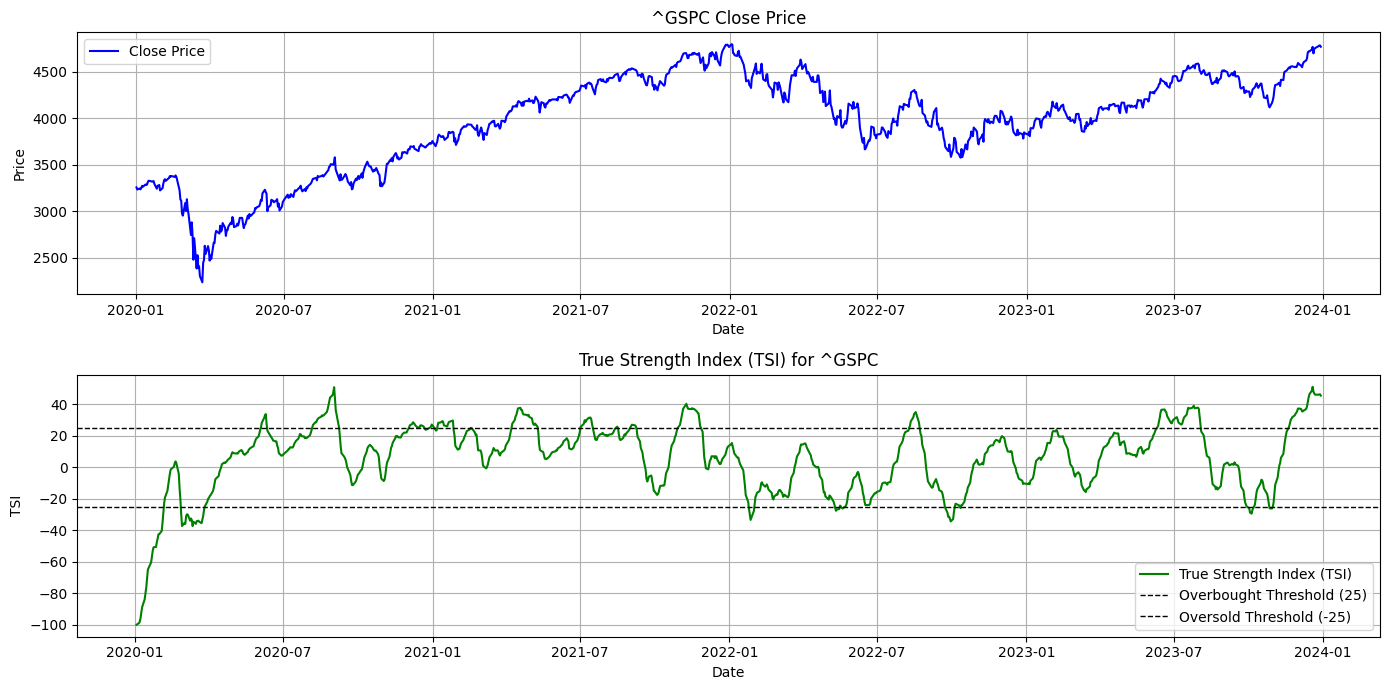

In [8]:

# Step 2: Calculate True Strength Index (TSI)
def calculate_tsi(data, r=25, s=13):
    # Price Change
    data['Price Change'] = data['Close'].diff()
    
    # Absolute Price Change
    data['Absolute Price Change'] = data['Price Change'].abs()
    
    # Double EMA of Price Change (PC)
    ema1_pc = data['Price Change'].ewm(span=r, adjust=False).mean()
    ema2_pc = ema1_pc.ewm(span=s, adjust=False).mean()
    
    # Double EMA of Absolute Price Change (APC)
    ema1_apc = data['Absolute Price Change'].ewm(span=r, adjust=False).mean()
    ema2_apc = ema1_apc.ewm(span=s, adjust=False).mean()
    
    # True Strength Index (TSI)
    data['TSI'] = (ema2_pc / ema2_apc) * 100
    
    return data



In [9]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply TSI calculation
    data = calculate_tsi(data)
    
    # Step 3: Plot Close Price and TSI
    plt.figure(figsize=(14, 7))
    
    # Plot Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot TSI
    plt.subplot(2, 1, 2)
    plt.plot(data['TSI'], label='True Strength Index (TSI)', color='green', linewidth=1.5)
    plt.axhline(25, color='black', linestyle='--', linewidth=1, label='Overbought Threshold (25)')
    plt.axhline(-25, color='black', linestyle='--', linewidth=1, label='Oversold Threshold (-25)')
    plt.title(f'True Strength Index (TSI) for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('TSI')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


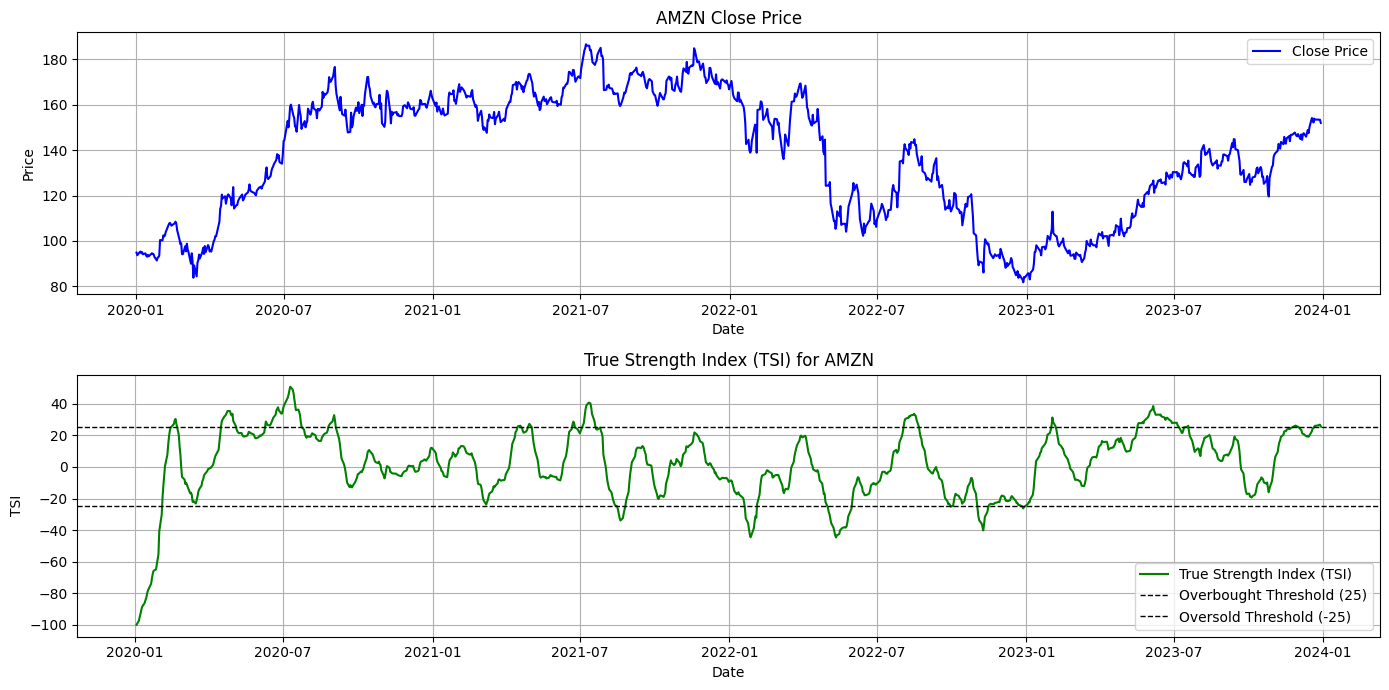

In [10]:
show_graph("AMZN")